initial: -1.3969529512767462 -0.2951341271296203 -0.009186081577320628
dynamic: -1.9869443919995613 -0.4561881021534213 0.0711501887428222


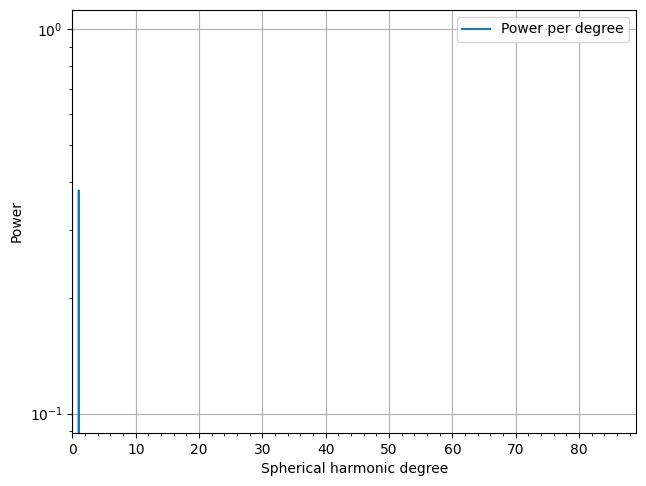

In [1]:
from src.utils import (
    load_complex_array_from_binary,
    elastic_load_signal_trends_path,
    dynamic_load_signal_trends_path,
)
from pyshtools import SHCoeffs

elastic_load_signal_trends = load_complex_array_from_binary(
    name="0", path=elastic_load_signal_trends_path
).real

C_1_0, C_1_1, S_1_1 = (
    elastic_load_signal_trends[0, 1, 0],
    elastic_load_signal_trends[0, 1, 1],
    elastic_load_signal_trends[1, 1, 1],
)

computed_elastic_load_signal_trends = load_complex_array_from_binary(
    name="0", path=dynamic_load_signal_trends_path
).real

computed_C_1_0, computed_C_1_1, computed_S_1_1 = (
    computed_elastic_load_signal_trends[0, 1, 0],
    computed_elastic_load_signal_trends[0, 1, 1],
    computed_elastic_load_signal_trends[1, 1, 1],
)

print("initial:", C_1_0, C_1_1, S_1_1)
print("dynamic:", computed_C_1_0, computed_C_1_1, computed_S_1_1)

clm = SHCoeffs.from_array(
    coeffs=computed_elastic_load_signal_trends - elastic_load_signal_trends
)
fig, ax = clm.plot_spectrum(show=False)

initial: -1.3969529512767462 -0.2951341271296203 -0.009186081577320628
dynamic: -1.9888601455777724 -0.4561855421412916 0.07067101680638067


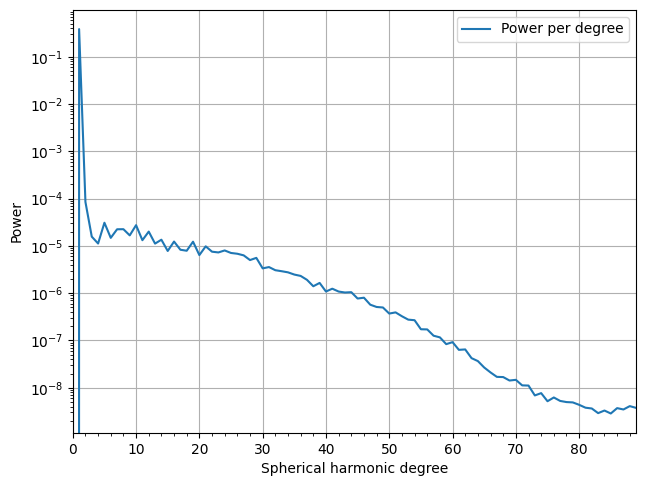

In [2]:
from src.utils import (
    load_complex_array_from_binary,
    elastic_load_signal_trends_path,
    dynamic_load_signal_trends_path,
)
from pyshtools import SHCoeffs

elastic_load_signal_trends = load_complex_array_from_binary(
    name="0", path=elastic_load_signal_trends_path
).real

C_1_0, C_1_1, S_1_1 = (
    elastic_load_signal_trends[0, 1, 0],
    elastic_load_signal_trends[0, 1, 1],
    elastic_load_signal_trends[1, 1, 1],
)

computed_elastic_load_signal_trends = load_complex_array_from_binary(
    name="2", path=dynamic_load_signal_trends_path
).real

computed_C_1_0, computed_C_1_1, computed_S_1_1 = (
    computed_elastic_load_signal_trends[0, 1, 0],
    computed_elastic_load_signal_trends[0, 1, 1],
    computed_elastic_load_signal_trends[1, 1, 1],
)

print("initial:", C_1_0, C_1_1, S_1_1)
print("dynamic:", computed_C_1_0, computed_C_1_1, computed_S_1_1)

clm = SHCoeffs.from_array(
    coeffs=computed_elastic_load_signal_trends - elastic_load_signal_trends
)
fig, ax = clm.plot_spectrum(show=False)